In [1]:
#installing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim.models import Word2Vec
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as log    
from sklearn import metrics    
    

In [2]:
#creating and intializing functions for preprocessing

english_stopwords = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

analyzer = SentimentIntensityAnalyzer()

def getSentiment(sentence):
    score = analyzer.polarity_scores(sentence)
    if score['compound'] >= .05:
        return 'positive'
    elif score['compound'] <= -.05:
        return 'negative'
    else :
        return 'neutral'
    


# Preprocessing the data

In [3]:
#loading datasets
march16 = pd.read_csv("0416_UkraineCombinedTweetsDeduped.csv", delimiter=",")

In [4]:
march16.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,272502906,GainMoneyFaster,𝙈𝙤𝙣𝙚𝙮 𝘾𝙤𝙖𝙘𝙝 showing you best Clever Passive In...,Bilbao,5684,5378,36592,2011-03-26 17:01:39.000000,1515117768835690500,2022-04-16 00:00:00.000000,0,HOMEWORK-ONLINE-HOMEWORK\n\nhttps://t.co/CLU7g...,"[{'text': 'passive', 'indices': [51, 59]}, {'t...",en,NaN,0,2022-04-16 00:41:51.716095
1,1,370729020,charisma_news,"To passionate, Spirit-filled Christians, Chari...","Lake Mary, Fla.",2491,20367,103069,2011-09-09 14:45:00.000000,1515117769062117376,2022-04-16 00:00:00.000000,0,"'Devastation, Heartbreak and Loss': #FranklinG...","[{'text': 'FranklinGraham', 'indices': [36, 51...",en,NaN,0,2022-04-16 00:18:05.364542
2,2,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,0,0,64,2022-04-08 12:02:47.000000,1515117770719043589,2022-04-16 00:00:00.000000,1,Animal shelter we need your help!\nRaising fun...,"[{'text': 'Ukraine', 'indices': [150, 158]}, {...",en,NaN,0,2022-04-16 00:18:05.343984
3,3,3908181014,AmiBelArt,PrivéSelfEducat\nMi & ~Mi.e.f.~\nArt&~\n~\nMiS...,amihowe@yahoo.com,1,384,103436,2015-10-16 00:26:46.000000,1515117770719260678,2022-04-16 00:00:00.000000,8,"Is the #west 🇺🇸🇬🇧🇪🇺🇨🇦 ""hiding behind #Ukraine ...","[{'text': 'west', 'indices': [22, 27]}, {'text...",en,NaN,0,2022-04-16 00:18:05.302882
4,4,227316021,frafuxa,In nature there are neither rewards nor punish...,NaN,784,432,12710,2010-12-16 14:27:25.000000,1515117771373305857,2022-04-16 00:00:00.000000,96,il 25 aprile così \n#NATO @Anpinazionale https...,"[{'text': 'NATO', 'indices': [33, 38]}]",it,NaN,0,2022-04-16 00:41:51.708059


In [5]:
#selecting only the "text" column and english tweets
march16_en = march16[march16["language"] == "en"]
march16_tweets = march16_en["text"]
march16_tweets = march16_tweets.reset_index(drop=True)
march16_tweets

0         HOMEWORK-ONLINE-HOMEWORK\n\nhttps://t.co/CLU7g...
1         'Devastation, Heartbreak and Loss': #FranklinG...
2         Animal shelter we need your help!\nRaising fun...
3         Is the #west 🇺🇸🇬🇧🇪🇺🇨🇦 "hiding behind #Ukraine ...
4         #ICYMI: @CNN's @ZainAsher intvws #ECW's @Yasmi...
                                ...                        
228473    🐾 This war affects Ukrainian pets and animals ...
228474    One of the partners of #WorldKitchen in #Ukrai...
228475    I appeal to American people &amp; government. ...
228476    #Mariupol The global food shortage caused by t...
228477    #Ukraine \n\nRemember this? \n\n#Donbass child...
Name: text, Length: 228478, dtype: object

In [6]:
#count of tweets
march16_tweets.count()

228478

In [7]:
#Creating labels using vader sentiment and adding it to the dataframe
march16_label =pd.DataFrame()
march16_label['label'] = pd.DataFrame(march16_tweets.map(lambda x: getSentiment(x)))


In [8]:
march16_label.head(10)

,label
0,positive
1,negative
2,positive
3,negative
4,positive
5,negative
6,neutral
7,positive
8,negative
9,positive


In [9]:
march16_label['label'].value_counts()

negative    114137
positive     72880
neutral      41461
Name: label, dtype: int64

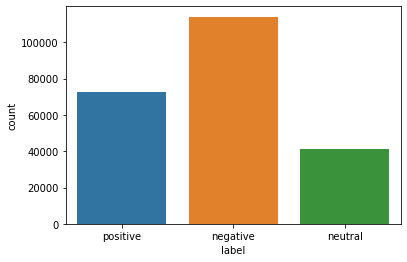

In [10]:
sns.countplot(x = "label", data = march16_label)
plt.show()

In [11]:
#cleaning dataset of punctuation and @
p = re.compile("[.,@;:!\"]")
march16_tweets = march16_tweets.map(lambda x: re.sub(p,"",x))

march16_tweets.head(10)


0    HOMEWORK-ONLINE-HOMEWORK\n\nhttps//tco/CLU7gY9...
1    'Devastation Heartbreak and Loss' #FranklinGra...
2    Animal shelter we need your help\nRaising fund...
3    Is the #west 🇺🇸🇬🇧🇪🇺🇨🇦 hiding behind #Ukraine 🇺...
4    #ICYMI CNN's ZainAsher intvws #ECW's YasmineSh...
5    🇷🇺💢🇺🇦⚓️\n\nRussia says it will scale up attack...
6    Russia begins delivery of second S-400 unit in...
7    Rep Tom Emmer introduces bill to provide certa...
8    Beijing has found itself in a geopolitical obs...
9    Russian President Vladimir Putin underscored t...
Name: text, dtype: object

In [12]:
#removing urls in the tweets
p = re.compile("http\S+")
march16_tweets = march16_tweets.map(lambda x: re.sub(p,"",x))

march16_tweets.head(10)

0    HOMEWORK-ONLINE-HOMEWORK\n\n\n\n#passive #inco...
1    'Devastation Heartbreak and Loss' #FranklinGra...
2    Animal shelter we need your help\nRaising fund...
3    Is the #west 🇺🇸🇬🇧🇪🇺🇨🇦 hiding behind #Ukraine 🇺...
4    #ICYMI CNN's ZainAsher intvws #ECW's YasmineSh...
5    🇷🇺💢🇺🇦⚓️\n\nRussia says it will scale up attack...
6    Russia begins delivery of second S-400 unit in...
7    Rep Tom Emmer introduces bill to provide certa...
8    Beijing has found itself in a geopolitical obs...
9    Russian President Vladimir Putin underscored t...
Name: text, dtype: object

In [13]:
#removing stop words
march16_tweets = march16_tweets.apply(lambda x: " ".join([w for w in x.lower().split() if w not in english_stopwords]))

In [14]:
march16_tweets

0         homework-online-homework #passive #income #mon...
1         'devastation heartbreak loss' #franklingraham ...
2         animal shelter need help raising funds food an...
3         #west 🇺🇸🇬🇧🇪🇺🇨🇦 hiding behind #ukraine 🇺🇦? anas...
4         #icymi cnn's zainasher intvws #ecw's yasminesh...
                                ...                        
228473    🐾 war affects ukrainian pets animals general n...
228474    one partners #worldkitchen #ukraine hit…damage...
228475    appeal american people &amp government we're g...
228476    #mariupol global food shortage caused war coul...
228477    #ukraine remember this? #donbass children livi...
Name: text, Length: 228478, dtype: object

In [15]:
# normalizing the dataset 
march16_tweets =march16_tweets.map(lambda x:" ".join([lemmatizer.lemmatize(w) for w in x.lower().split()]))

In [16]:
march16_tweets

0         homework-online-homework #passive #income #mon...
1         'devastation heartbreak loss' #franklingraham ...
2         animal shelter need help raising fund food ani...
3         #west 🇺🇸🇬🇧🇪🇺🇨🇦 hiding behind #ukraine 🇺🇦? anas...
4         #icymi cnn's zainasher intvws #ecw's yasminesh...
                                ...                        
228473    🐾 war affect ukrainian pet animal general natu...
228474    one partner #worldkitchen #ukraine hit…damage ...
228475    appeal american people &amp government we're g...
228476    #mariupol global food shortage caused war coul...
228477    #ukraine remember this? #donbass child living ...
Name: text, Length: 228478, dtype: object

In [17]:

tokenized_tweet = march16_tweets.apply(lambda x: x.split())
tokenized_tweet.head()

0    [homework-online-homework, #passive, #income, ...
1    ['devastation, heartbreak, loss', #franklingra...
2    [animal, shelter, need, help, raising, fund, f...
3    [#west, 🇺🇸🇬🇧🇪🇺🇨🇦, hiding, behind, #ukraine, 🇺🇦...
4    [#icymi, cnn's, zainasher, intvws, #ecw's, yas...
Name: text, dtype: object

## creating and training gensim word2vec model. only using skip-gram model

In [18]:


model = Word2Vec(tokenized_tweet, vector_size = 200, sg = 1)
model.train(tokenized_tweet,total_examples= march16_tweets.count(), epochs=25)

(93963010, 103067325)

In [19]:
model.wv.most_similar(positive ='russia')

[('continued?', 0.46372684836387634),
 ('impunity#armukrainenow', 0.44942161440849304),
 ('impudent', 0.4348713755607605),
 ('eu?nobody', 0.4297979772090912),
 ('destructionnobody', 0.42521482706069946),
 ('larstherationa1', 0.41658008098602295),
 ('👇🤣👉🇷🇺💩', 0.4153880178928375),
 ('offender-russia', 0.4146200120449066),
 ('kramatorsknobody', 0.41148245334625244),
 ('goverment', 0.4048721492290497)]

In [20]:
model.wv.most_similar(negative ='ukraine')

[('#beautiful', 0.08615749329328537),
 ('#lgbt', 0.08452285826206207),
 ('#fire', 0.0818837434053421),
 ('#fashion', 0.051467012614011765),
 ('#ranbiraliawedding', 0.050587672740221024),
 ('#ncat', 0.0499306246638298),
 ('#romanabramovich', 0.047542136162519455),
 ('presssec', 0.04557526111602783),
 ('#ireland', 0.045527733862400055),
 ('#python', 0.043969105929136276)]

## Using the word2vec model to create a tweet vector by taking the average of the words present within a tweet

In [21]:
#function to return the average vector of the words used within a tweet
w2v_words = list(model.wv.key_to_index)
def word_vector(tokens, size):
    sent = np.zeros(200)
    count = 0
    for word in tokens:
        if word in w2v_words:
            vec = model.wv[word]
            sent += vec
            count += 1
    if count != 0:
        sent /= count
    return sent

In [22]:
#creating the tweet vector by feeding in the tweets
vector = []
for sent in tokenized_tweet:
    sentence = word_vector(sent, 200)
    vector.append(sentence)
    

In [23]:
#finishing the tweet dataset with tweet vector and labels
tweet_vector = pd.DataFrame(vector)
tweet_vector['label'] = pd.DataFrame(march16_label['label'])
tweet_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.221778,-0.188661,0.124906,0.208700,-0.117573,-0.049293,-0.081214,0.182190,-0.181910,0.201158,...,-0.174994,-0.137151,-0.553887,0.258481,0.003812,0.143361,-0.633057,-0.037951,0.412278,positive
1,0.325522,-0.044484,-0.081159,0.100701,-0.094413,0.236727,-0.078864,0.221598,-0.363261,0.223067,...,-0.364301,-0.048564,-0.369794,0.636776,0.187102,-0.205543,-0.309447,-0.033874,0.126291,negative
2,0.099105,0.341775,0.148055,0.282035,0.200642,0.359792,0.025301,0.208280,-0.617161,-0.211943,...,-0.413263,-0.291350,-0.318531,0.083897,-0.082195,0.282507,-0.255288,0.068777,0.313506,positive
3,0.087070,-0.053014,-0.046753,0.118767,0.081760,-0.073515,0.035324,0.240897,-0.090580,0.035342,...,-0.208657,-0.208343,-0.249527,0.113895,0.089195,0.165165,-0.047587,0.189896,0.032518,negative
4,0.421262,0.062337,0.341419,0.039687,0.140477,-0.156865,-0.103013,0.192881,-0.235412,-0.061787,...,-0.425664,-0.353004,-0.180279,0.252647,-0.022633,0.116785,0.134964,0.112766,0.283440,positive


In [24]:
tweet_vector.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
196      0
197      0
198      0
199      0
label    0
Length: 201, dtype: int64

In [25]:
tweet_vector

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.221778,-0.188661,0.124906,0.208700,-0.117573,-0.049293,-0.081214,0.182190,-0.181910,0.201158,...,-0.174994,-0.137151,-0.553887,0.258481,0.003812,0.143361,-0.633057,-0.037951,0.412278,positive
1,0.325522,-0.044484,-0.081159,0.100701,-0.094413,0.236727,-0.078864,0.221598,-0.363261,0.223067,...,-0.364301,-0.048564,-0.369794,0.636776,0.187102,-0.205543,-0.309447,-0.033874,0.126291,negative
2,0.099105,0.341775,0.148055,0.282035,0.200642,0.359792,0.025301,0.208280,-0.617161,-0.211943,...,-0.413263,-0.291350,-0.318531,0.083897,-0.082195,0.282507,-0.255288,0.068777,0.313506,positive
3,0.087070,-0.053014,-0.046753,0.118767,0.081760,-0.073515,0.035324,0.240897,-0.090580,0.035342,...,-0.208657,-0.208343,-0.249527,0.113895,0.089195,0.165165,-0.047587,0.189896,0.032518,negative
4,0.421262,0.062337,0.341419,0.039687,0.140477,-0.156865,-0.103013,0.192881,-0.235412,-0.061787,...,-0.425664,-0.353004,-0.180279,0.252647,-0.022633,0.116785,0.134964,0.112766,0.283440,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228473,0.267751,0.199238,-0.216051,0.152915,0.220038,0.071306,-0.030877,0.245804,-0.405572,-0.159152,...,-0.206390,-0.341437,-0.234479,0.106749,0.125937,0.027116,-0.152054,0.152350,-0.059635,negative
228474,0.234454,0.002609,-0.144848,0.166286,-0.002466,0.222609,0.131351,0.300234,-0.190239,0.053814,...,-0.216148,-0.295553,-0.397433,0.057764,0.126432,-0.043270,-0.367528,0.243047,0.209073,neutral
228475,0.136970,-0.101604,0.034394,-0.018222,0.175042,0.282470,-0.160906,0.075634,-0.242358,-0.218570,...,-0.024751,-0.332994,-0.576828,0.296748,0.055770,0.317631,0.302240,0.336533,-0.107292,positive
228476,-0.151767,0.036743,0.078531,-0.022797,0.097288,-0.226506,0.101483,0.351879,-0.229858,0.085225,...,-0.147522,-0.161774,0.103101,0.170746,0.122060,0.054614,-0.192284,0.160531,0.277016,negative


## Testing logistic regression and decision tree using tweet vector dataset

In [26]:
#preparing to test the models
y_col = "label"
y = tweet_vector[y_col]
X = tweet_vector.drop(y_col,axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state =42)

### logistic regression

In [27]:
logit = log(solver='lbfgs',max_iter=5000).fit(X_train , y_train)
training_score = logit.score(X_train, y_train)
testing_score = logit.score(X_test, y_test)
y_pred = logit.predict(X_test)

print("training score:", training_score)
print("testing score:", testing_score)
print("precision score:" ,precision_score(y_test,y_pred, average = 'macro'))
print("recall score:", recall_score(y_test,y_pred, average = 'macro'))
print("f1Score:",f1_score(y_test,y_pred,average='macro'))
print('Classification Report: \n',metrics.classification_report(y_test, y_pred))

training score: 0.7889179459684214
testing score: 0.7875306372549019
precision score: 0.7776528145489133
recall score: 0.7495442101780432
f1Score: 0.7612238763621425
Classification Report: 
               precision    recall  f1-score   support

    negative       0.81      0.86      0.83     22929
     neutral       0.76      0.63      0.69      8139
    positive       0.77      0.76      0.76     14628

    accuracy                           0.79     45696
   macro avg       0.78      0.75      0.76     45696
weighted avg       0.79      0.79      0.79     45696



### decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 30,random_state = 42).fit(X_train,y_train)

training_score = tree.score(X_train, y_train)
testing_score = tree.score(X_test, y_test)
y_pred = tree.predict(X_test)

print("training score:", training_score)
print("testing score:", testing_score)
print("precision score:" ,precision_score(y_test,y_pred, average = 'macro'))
print("recall score:", recall_score(y_test,y_pred, average = 'macro'))
print("f1Score:",f1_score(y_test,y_pred,average='macro'))
print('Classification Report: \n',metrics.classification_report(y_test, y_pred))

training score: 0.9950378045978269
testing score: 0.9258140756302521
precision score: 0.9199001705899512
recall score: 0.9178814002803292
f1Score: 0.918878887751871
Classification Report: 
               precision    recall  f1-score   support

    negative       0.94      0.95      0.94     22929
     neutral       0.90      0.90      0.90      8139
    positive       0.92      0.91      0.91     14628

    accuracy                           0.93     45696
   macro avg       0.92      0.92      0.92     45696
weighted avg       0.93      0.93      0.93     45696

